In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题


# def load_data():
#     df_train=pd.read_excel('order_is_cash_2_hz.xlsx')
# #     df_train.drop(['Unnamed: 0'],inplace=True,axis=1)
#     return df_train

df_train=pd.read_excel('order_is_cash_2_hz.xlsx')
df_train['result'] = 1
# df2=pd.read_excel('order_is_cash_3_hz.xlsx')
# df2['result'] = 0
# df_train = df1.append(df2)
print('打印样本数据')

打印样本数据


In [551]:
df_train.drop(['商户号','总笔数','总金额'],axis=1,inplace=True)
df_train.head()


,客单价,用户数,总笔数/用户数,总金额/用户数,近12月有交易的月数,近1月交易天数,近3月交易天数,近6月交易天数,近12月交易天数,近1月交易笔数,...,近12月交易总金额,近1月22:00~04:00的交易总笔数,近1月22:00~04:00的交易总金额,近3月22:00~04:00的交易总笔数,近3月22:00~04:00的交易总金额,近6月22:00~04:00的交易总笔数,近6月22:00~04:00的交易总金额,近12月22:00~04:00的交易总笔数,近12月22:00~04:00的交易总金额,result
0,2202.22,20.0,30.00,66066.53,7.0,12.0,35.0,92.0,104.0,27.0,...,1321330.55,4.0,40253.95,21.0,91802.45,176.0,399445.35,213.0,410420.35,1
1,3299.91,14.0,22.07,72833.72,11.0,7.0,19.0,53.0,71.0,29.0,...,1019672.03,4.0,19479.90,8.0,31329.90,73.0,226936.78,80.0,258503.78,1
2,1486.66,262.0,1.11,1656.89,11.0,18.0,50.0,105.0,174.0,29.0,...,434106.00,1.0,1800.00,2.0,2815.00,2.0,2815.00,3.0,3515.00,1
3,21626.89,134.0,2.05,44383.54,9.0,10.0,45.0,96.0,134.0,23.0,...,5947394.70,1.0,49985.00,1.0,49985.00,3.0,88551.00,4.0,102421.00,1
4,5903.53,19.0,14.37,84824.47,7.0,4.0,30.0,92.0,106.0,7.0,...,1611665.00,1.0,7790.00,5.0,21200.00,17.0,66105.00,17.0,66105.00,1


In [552]:
print(df_train.shape)
df_train.info()

(479, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 26 columns):
客单价                      479 non-null float64
用户数                      479 non-null float64
总笔数/用户数                  479 non-null float64
总金额/用户数                  479 non-null float64
近12月有交易的月数               479 non-null float64
近1月交易天数                  479 non-null float64
近3月交易天数                  479 non-null float64
近6月交易天数                  479 non-null float64
近12月交易天数                 479 non-null float64
近1月交易笔数                  479 non-null float64
近1月交易总金额                 479 non-null float64
近3月交易笔数                  479 non-null float64
近3月交易总金额                 479 non-null float64
近6月交易笔数                  479 non-null float64
近6月交易总金额                 479 non-null float64
近12月交易笔数                 479 non-null float64
近12月交易总金额                479 non-null float64
近1月22:00~04:00的交易总笔数     479 non-null float64
近1月22:00~04:00的交易总金额     479 non-null float64
近3月22:00~04

In [553]:
def outlier_check(df,c_name):
    p=df[[c_name]].boxplot(return_type='dict')
#     print(p)
#     print(type(p))
    x_outliers=p['fliers'][0].get_xdata()
#     print(type(x_outliers))
#     print('x_outliers:');print(x_outliers)
    y_outliers = p['fliers'][0].get_ydata()
#     print(type(y_outliers))
#     print('y_outliers:');print(y_outliers)
    for j in range(1):
#         print('j:',j)
        plt.annotate(y_outliers[j], xy=(x_outliers[j], y_outliers[j]), xytext=(x_outliers[j] + 0.02, y_outliers[j]))
    plt.show()  

变量【客单价】的极值图形分布如下


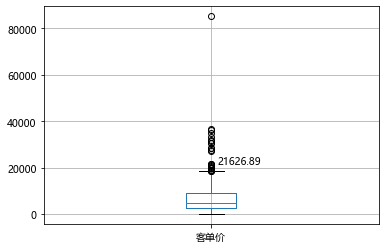

删除变量【客单价20000以上的记录
(460, 26)


In [554]:
print("变量【客单价】的极值图形分布如下")
outlier_check(df_train,'客单价')
print("删除变量【客单价20000以上的记录")
df_train=df_train[df_train['客单价']<20000]
print(df_train.shape)

变量【用户数】的极值图形分布如下


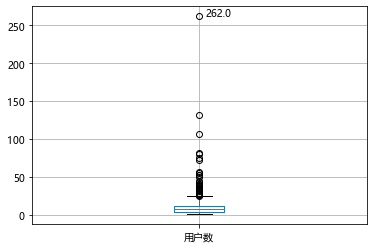

删除变量【用户数】50以上的记录
(448, 26)


In [555]:
print("变量【用户数】的极值图形分布如下")
outlier_check(df_train,'用户数')
print("删除变量【用户数】50以上的记录")
df_train=df_train[df_train['用户数']<50]
print(df_train.shape)

变量【总笔数/用户数】的极值图形分布如下


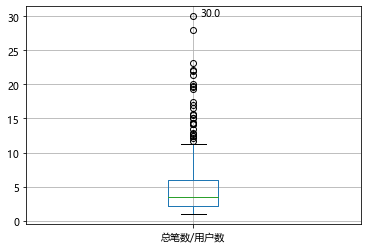

删除变量【总笔数/用户数20以上的记录
(431, 26)


In [556]:
print("变量【总笔数/用户数】的极值图形分布如下")
outlier_check(df_train,'总笔数/用户数')
print("删除变量【总笔数/用户数20以上的记录")
df_train=df_train[df_train['总笔数/用户数']<15]
print(df_train.shape)

变量【总金额/用户数】的极值图形分布如下


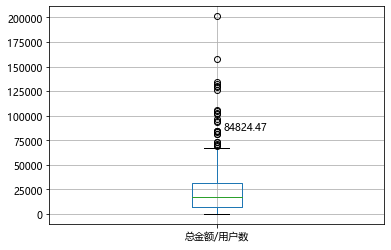

删除变量【总金额/用户数100000以上的记录
(411, 26)


In [557]:
print("变量【总金额/用户数】的极值图形分布如下")
outlier_check(df_train,'总金额/用户数')
print("删除变量【总金额/用户数100000以上的记录")
df_train=df_train[df_train['总金额/用户数']<75000]
print(df_train.shape)

In [558]:
df_train.head()

,客单价,用户数,总笔数/用户数,总金额/用户数,近12月有交易的月数,近1月交易天数,近3月交易天数,近6月交易天数,近12月交易天数,近1月交易笔数,...,近12月交易总金额,近1月22:00~04:00的交易总笔数,近1月22:00~04:00的交易总金额,近3月22:00~04:00的交易总笔数,近3月22:00~04:00的交易总金额,近6月22:00~04:00的交易总笔数,近6月22:00~04:00的交易总金额,近12月22:00~04:00的交易总笔数,近12月22:00~04:00的交易总金额,result
5,1795.02,38.0,6.42,11525.94,8.0,11.0,33.0,59.0,71.0,40.0,...,437985.54,3.0,1929.0,13.0,9601.9,19.0,12089.9,22.0,12359.9,1
6,3991.39,17.0,14.29,57053.34,8.0,9.0,37.0,66.0,76.0,24.0,...,969906.80,4.0,42960.0,13.0,72728.0,18.0,95752.0,18.0,95752.0,1
8,3497.10,24.0,9.58,33513.89,6.0,17.0,47.0,78.0,78.0,38.0,...,804333.34,1.0,180.0,1.0,180.0,1.0,180.0,1.0,180.0,1
9,7245.16,21.0,10.05,72796.57,9.0,17.0,45.0,80.0,107.0,26.0,...,1528728.00,2.0,18942.0,4.0,27227.0,11.0,79743.0,11.0,79743.0,1
11,7525.96,43.0,4.09,30803.93,11.0,9.0,24.0,50.0,90.0,14.0,...,1324568.99,2.0,5192.0,8.0,37324.0,14.0,68418.0,15.0,88318.0,1


In [559]:
# df_train.rename(columns={"近12月有交易的月数":"近12月月数"},inplace=True)
# print("变量【近12月有交易的月数】的极值图形分布如下")
# outlier_check(df_train,'近12月有交易的月数')
# print("删除变量【近12月有交易的月数】100000以上的记录")
# df_train=df_train[df_train['近12月有交易的月数']<100000]
print(df_train.shape)

(411, 26)


变量【近1月交易天数】的极值图形分布如下


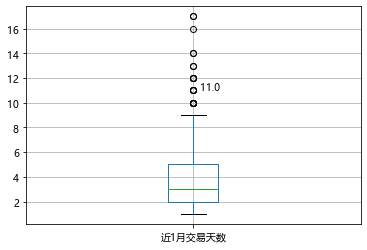

删除变量【近1月交易天数】100000以上的记录
(390, 26)


In [560]:
print("变量【近1月交易天数】的极值图形分布如下")
outlier_check(df_train,'近1月交易天数')
print("删除变量【近1月交易天数】100000以上的记录")
df_train=df_train[df_train['近1月交易天数']<10]
print(df_train.shape)

变量【近3月交易天数】的极值图形分布如下


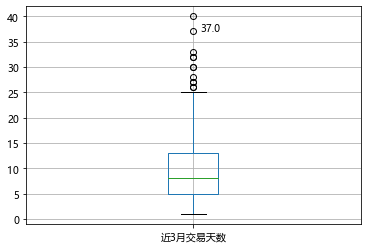

删除变量【近3月交易天数】40以上的记录
(373, 26)


In [561]:
print("变量【近3月交易天数】的极值图形分布如下")
outlier_check(df_train,'近3月交易天数')
print("删除变量【近3月交易天数】40以上的记录")
df_train=df_train[df_train['近3月交易天数']<25]
print(df_train.shape)

变量【近6月交易天数】的极值图形分布如下


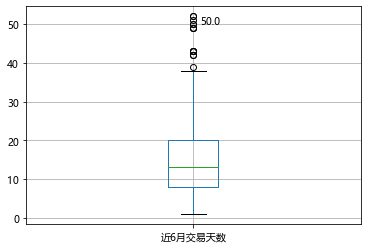

删除变量【近6月交易天数】60以上的记录
(359, 26)


In [562]:
print("变量【近6月交易天数】的极值图形分布如下")
outlier_check(df_train,'近6月交易天数')
print("删除变量【近6月交易天数】60以上的记录")
df_train=df_train[df_train['近6月交易天数']<40]
print(df_train.shape)

变量【近12月交易天数】的极值图形分布如下


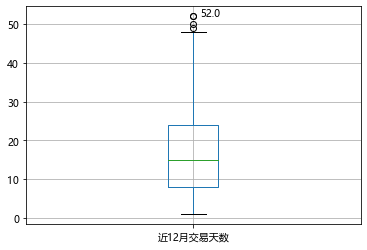

删除变量【近12月交易天数】80以上的记录
(356, 26)


In [563]:
print("变量【近12月交易天数】的极值图形分布如下")
outlier_check(df_train,'近12月交易天数')
print("删除变量【近12月交易天数】80以上的记录")
df_train=df_train[df_train['近12月交易天数']<50]
print(df_train.shape)

变量【近1月交易笔数】的极值图形分布如下


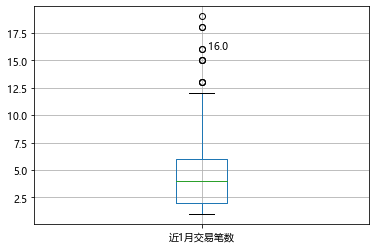

删除变量【近1月交易笔数】25以上的记录
(348, 26)


In [564]:
print("变量【近1月交易笔数】的极值图形分布如下")
outlier_check(df_train,'近1月交易笔数')
print("删除变量【近1月交易笔数】25以上的记录")
df_train=df_train[df_train['近1月交易笔数']<15]
print(df_train.shape)

变量【近3月交易笔数】的极值图形分布如下


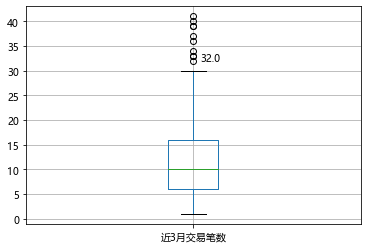

删除变量【近3月交易笔数】80以上的记录
(346, 26)


In [565]:
print("变量【近3月交易笔数】的极值图形分布如下")
outlier_check(df_train,'近3月交易笔数')
print("删除变量【近3月交易笔数】80以上的记录")
df_train=df_train[df_train['近3月交易笔数']<40]
print(df_train.shape)

变量【近6月交易笔数】的极值图形分布如下


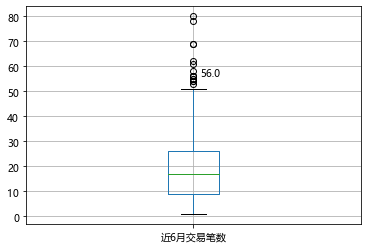

删除变量【近6月交易笔数】120以上的记录
(340, 26)


In [566]:
print("变量【近6月交易笔数】的极值图形分布如下")
outlier_check(df_train,'近6月交易笔数')
print("删除变量【近6月交易笔数】120以上的记录")
df_train=df_train[df_train['近6月交易笔数']<60]
print(df_train.shape)

变量【近12月交易笔数】的极值图形分布如下


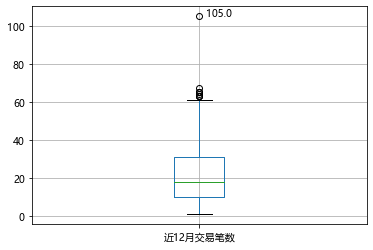

删除变量【近12月交易笔数】120以上的记录
(338, 26)


In [567]:
print("变量【近12月交易笔数】的极值图形分布如下")
outlier_check(df_train,'近12月交易笔数')
print("删除变量【近12月交易笔数】120以上的记录")
df_train=df_train[df_train['近12月交易笔数']<67]
print(df_train.shape)

变量【近1月交易总金额】的极值图形分布如下


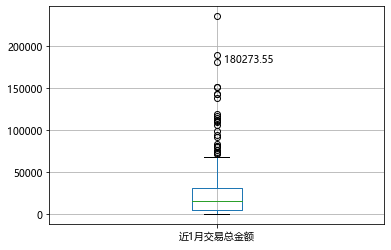

删除变量【近1月交易总金额】120以上的记录
(323, 26)


In [568]:
print("变量【近1月交易总金额】的极值图形分布如下")
outlier_check(df_train,'近1月交易总金额')
print("删除变量【近1月交易总金额】120以上的记录")
df_train=df_train[df_train['近1月交易总金额']<100000]
print(df_train.shape)

变量【近3月交易总金额】的极值图形分布如下


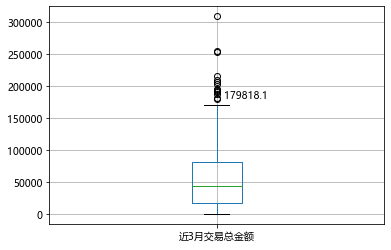

删除变量【近3月交易总金额】120以上的记录
(316, 26)


In [569]:
print("变量【近3月交易总金额】的极值图形分布如下")
outlier_check(df_train,'近3月交易总金额')
print("删除变量【近3月交易总金额】120以上的记录")
df_train=df_train[df_train['近3月交易总金额']<200000]
print(df_train.shape)

变量【近6月交易总金额】的极值图形分布如下


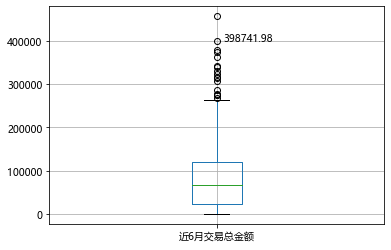

删除变量【近6月交易总金额】120以上的记录
(304, 26)


In [570]:
print("变量【近6月交易总金额】的极值图形分布如下")
outlier_check(df_train,'近6月交易总金额')
print("删除变量【近6月交易总金额】120以上的记录")
df_train=df_train[df_train['近6月交易总金额']<300000]
print(df_train.shape)

变量【近12月交易总金额】的极值图形分布如下


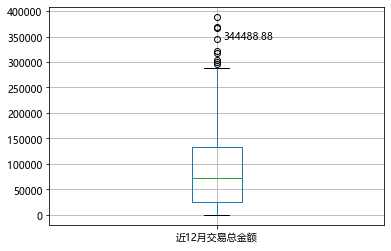

删除变量【近12月交易总金额】120以上的记录
(296, 26)


In [571]:
print("变量【近12月交易总金额】的极值图形分布如下")
outlier_check(df_train,'近12月交易总金额')
print("删除变量【近12月交易总金额】120以上的记录")
df_train=df_train[df_train['近12月交易总金额']<300000]
print(df_train.shape)

变量【近1月22:00~04:00的交易总笔数】的极值图形分布如下


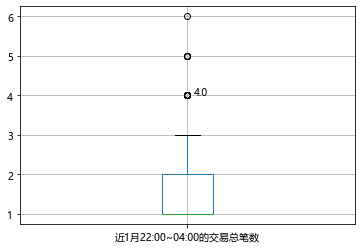

删除变量【近1月22:00~04:00的交易总笔数】120以上的记录
(282, 26)


In [572]:
print("变量【近1月22:00~04:00的交易总笔数】的极值图形分布如下")
outlier_check(df_train,'近1月22:00~04:00的交易总笔数')
print("删除变量【近1月22:00~04:00的交易总笔数】120以上的记录")
df_train=df_train[df_train['近1月22:00~04:00的交易总笔数']<4]
print(df_train.shape)

变量【近3月22:00~04:00的交易总笔数】的极值图形分布如下


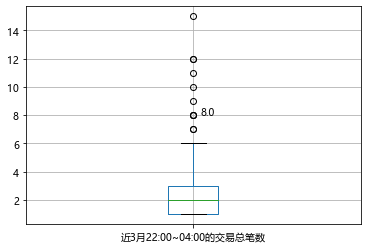

删除变量【近3月22:00~04:00的交易总笔数】120以上的记录
(263, 26)


In [573]:
print("变量【近3月22:00~04:00的交易总笔数】的极值图形分布如下")
outlier_check(df_train,'近3月22:00~04:00的交易总笔数')
print("删除变量【近3月22:00~04:00的交易总笔数】120以上的记录")
df_train=df_train[df_train['近3月22:00~04:00的交易总笔数']<6]
print(df_train.shape)

变量【近6月22:00~04:00的交易总笔数】的极值图形分布如下


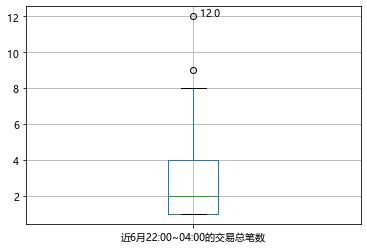

删除变量【近6月22:00~04:00的交易总笔数】120以上的记录
(258, 26)


In [574]:
print("变量【近6月22:00~04:00的交易总笔数】的极值图形分布如下")
outlier_check(df_train,'近6月22:00~04:00的交易总笔数')
print("删除变量【近6月22:00~04:00的交易总笔数】120以上的记录")
df_train=df_train[df_train['近6月22:00~04:00的交易总笔数']<8]
print(df_train.shape)

变量【近12月22:00~04:00的交易总笔数】的极值图形分布如下


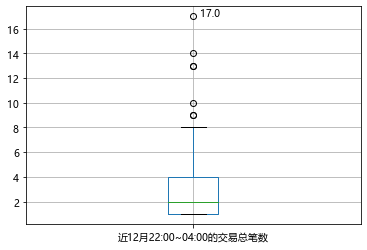

删除变量【近12月22:00~04:00的交易总笔数】120以上的记录
(246, 26)


In [575]:
print("变量【近12月22:00~04:00的交易总笔数】的极值图形分布如下")
outlier_check(df_train,'近12月22:00~04:00的交易总笔数')
print("删除变量【近12月22:00~04:00的交易总笔数】120以上的记录")
df_train=df_train[df_train['近12月22:00~04:00的交易总笔数']<8]
print(df_train.shape)

变量【近1月22:00~04:00的交易总金额】的极值图形分布如下


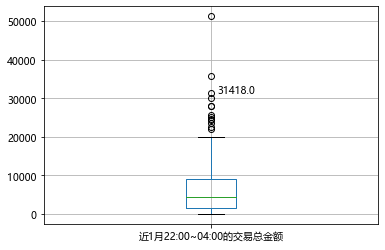

删除变量【近1月22:00~04:00的交易总金额】120以上的记录
(236, 26)


In [576]:
print("变量【近1月22:00~04:00的交易总金额】的极值图形分布如下")
outlier_check(df_train,'近1月22:00~04:00的交易总金额')
print("删除变量【近1月22:00~04:00的交易总金额】120以上的记录")
df_train=df_train[df_train['近1月22:00~04:00的交易总金额']<24000]
print(df_train.shape)

变量【近3月22:00~04:00的交易总金额】的极值图形分布如下


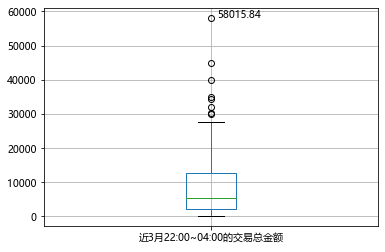

删除变量【近3月22:00~04:00的交易总金额】120以上的记录
(229, 26)


In [577]:
print("变量【近3月22:00~04:00的交易总金额】的极值图形分布如下")
outlier_check(df_train,'近3月22:00~04:00的交易总金额')
print("删除变量【近3月22:00~04:00的交易总金额】120以上的记录")
df_train=df_train[df_train['近3月22:00~04:00的交易总金额']<30000]
print(df_train.shape)

变量【近6月22:00~04:00的交易总金额】的极值图形分布如下


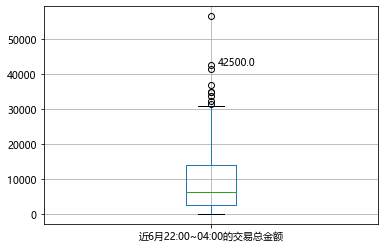

删除变量【近6月22:00~04:00的交易总金额】120以上的记录
(221, 26)


In [578]:
print("变量【近6月22:00~04:00的交易总金额】的极值图形分布如下")
outlier_check(df_train,'近6月22:00~04:00的交易总金额')
print("删除变量【近6月22:00~04:00的交易总金额】120以上的记录")
df_train=df_train[df_train['近6月22:00~04:00的交易总金额']<32000]
print(df_train.shape)

In [583]:
# print("变量【近12月22:00~04:00的交易总金额】的极值图形分布如下")
# outlier_check(df_train,'近12月22:00~04:00的交易总金额')
print("删除变量【近12月22:00~04:00的交易总金额】120以上的记录")
df_train=df_train[df_train['近12月22:00~04:00的交易总金额']<30000]
print(df_train.shape)

删除变量【近12月22:00~04:00的交易总金额】120以上的记录
(219, 26)


In [ ]:
df_train

In [584]:
df_train.to_excel('order_is_cash_2_hz_new.xlsx',index=False)